## Primer cuaderno

En este cuaderno exploraremos los datos del dataset iris y usaremos una regresión logística para clasificar las flores en tres categorías.

Importamos las librerías necesarias y cargamos el dataset.
Antes de comenzar, es importante mencionar que el dataset iris es un conjunto de datos que contiene 150 muestras de flores iris de tres especies diferentes. Las tres clases en el dataset son: Iris-setosa, Iris-versicolor e Iris-virginica. Cada muestra tiene cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Además debes tener en cuenta que se requieren las siguientes librerías:
- pandas
- numpy
- matplotlib
- scikit-learn

Si no tienes alguna de estas librerías, puedes instalarlas con el siguiente comando:
```bash
pip install pandas numpy matplotlib scikit-learn
```

In [1]:

#### Importamos las librerias necesarias para el desarrollo del ejercicio
### Antes instalamos las librerias necesarias en consola

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

Vamos a cargar el dataset y a visualizar las primeras filas.

In [2]:
# import some data to play with
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
import pandas as pd

# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
Y = iris.target

### Serie de pandas para la variable dependiente

Y_df = pd.Series(Y, name='species')
Y_df

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [6]:
DF_total= pd.concat([iris_df, Y_df], axis=1)
DF_total

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


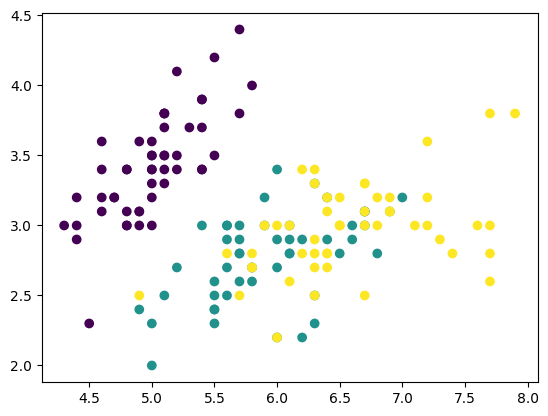

In [7]:
### Gráficos de dispersión

plt.scatter(DF_total['sepal length (cm)'], DF_total['sepal width (cm)'], c=DF_total['species'])
plt.savefig('scatter.png')
plt.show()


## Ahora sí a modelar

Usamos una regrsión logistica para predecir la especie de la flor usando las cuatro variables independientes. En terminos computacionales el modelo se define como un objeto de la clase `LogisticRegression` de la librería `scikit-learn`. Como todas las clases de modelos en `scikit-learn`, el modelo de regresión logística tiene los métodos `fit` y `predict`. El método `fit` se usa para ajustar el modelo a los datos de entrenamiento, mientras que el método `predict` se usa para predecir la especie de la flor usando datos no vistos.

In [8]:
modelo_log = LogisticRegression(random_state=42, max_iter=1000)
modelo_log

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
modelo_log.fit(iris_df, Y_df)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
modelo_log.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [11]:
iris_df.loc[78]

sepal length (cm)    6.0
sepal width (cm)     2.9
petal length (cm)    4.5
petal width (cm)     1.5
Name: 78, dtype: float64

In [12]:
modelo_log.predict([[6,3,4,1.3]])

c:\Users\cizai\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

En este caso, la regresión logistica permite predecir la probabilidad de que una observación pertenezca a una de las tres clases. La clase con la probabilidad más alta es la que se predice. La fórmula matemática que se usa para predecir la probabilidad de que una observación pertenezca a una clase es la siguiente:

$$P(Y = 1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4)}}$$

In [13]:
modelo_log.predict_proba([[6,3,4,1.3]])

c:\Users\cizai\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.02366469, 0.95014033, 0.02619499]])

Al examinar los coeficientes, vemos una matriz de 3x4 porque tenemos tres clases y cuatro variables independientes. Cada coeficiente muestra cómo cambia la probabilidad (en escala logarítmica) de pertenecer a una clase cuando la variable independiente aumenta en una unidad.

In [14]:
modelo_log.coef_

array([[-0.42019241,  0.96692326, -2.51895541, -1.08458493],
       [ 0.53183395, -0.31524888, -0.20404608, -0.9427976 ],
       [-0.11164154, -0.65167438,  2.72300148,  2.02738252]])

## Evaluación del modelo

Para evaluar el modelo, usamos la matriz de confusión, que es una tabla que muestra las predicciones en comparación con los valores reales. La diagonal principal de la matriz muestra el número de predicciones correctas, mientras que los elementos fuera de la diagonal principal muestran el número de predicciones incorrectas. La precisión del modelo se calcula como el número de predicciones correctas dividido por el número total de predicciones.

En este caso la matriz se define como:

$$\begin{bmatrix}
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{bmatrix}$$

Donde $A_{ij}$ es el número de observaciones que pertenecen a la clase $i$ y que fueron clasificadas como clase $j$.


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_df, modelo_log.predict(iris_df))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [16]:
[Y_df.values,[modelo_log.predict(iris_df)]]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [17]:
Y_df=pd.DataFrame(Y_df)
pred=pd.DataFrame(modelo_log.predict(iris_df))

DF_revisión=pd.concat([Y_df,pred],axis=1)
DF_revisión.columns = ['real', 'pred']
DF_revisión[DF_revisión['real'] != DF_revisión['pred']]

,real,pred
70,1,2
77,1,2
83,1,2
106,2,1


Recuerden que:

- Falsos positivos (FP): Observaciones que se clasificaron incorrectamente como positivas.
- Falsos Negativos (FN): Observaciones que se clasificaron incorrectamente como negativas.
- Verdaderos positivos (TP): Observaciones que se clasificaron correctamente como positivas.
- Verdaderos negativos (TN): Observaciones que se clasificaron correctamente como negativas.

De estas medidas se pueden calcular otras medidas de desempeño como la sensibilidad, especificidad y la precisión.

Se definen como sigue:

Precisión: $$\frac{TP}{TP + FP}$$

Sensibilidad (Recall) : $$\frac{TP}{TP + FN}$$

Especificidad: $$\frac{TN}{TN + FP}$$

F1: $$2 \times \frac{Precisión \times Exhaustividad}{Precisión + Exhaustividad}$$

Exacitud: $$\frac{TP + TN}{TP + TN + FP + FN}$$



### Curva Roc

La curva ROC es una gráfica que muestra la relación entre la sensibilidad y la especificidad. La sensibilidad se representa en el eje y y la especificidad en el eje x. La curva ROC muestra el desempeño del modelo para todos los umbrales de clasificación. La curva ROC es útil para comparar modelos. Un modelo con una curva ROC más cercana al eje y tiene un mejor desempeño que un modelo con una curva ROC más alejada del eje y.

Sensitividad: $$\frac{TP}{TP + FN}$$
Especificidad: $$\frac{TN}{TN + FP}$$

In [18]:
## Ejemplo Curva ROC - Clasificación binaria BREAST CANCER

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
Y_cancer = cancer.target
Y_cancer_df = pd.Series(Y_cancer, name='cancer')
Y_cancer_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: cancer, Length: 569, dtype: int32

In [20]:
DF_cancer_total= pd.concat([cancer_df, Y_cancer_df], axis=1)

modelo_log_cancer = LogisticRegression(random_state=42, max_iter=1000)
modelo_log_cancer.fit(cancer_df, Y_cancer_df)

c:\Users\cizai\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

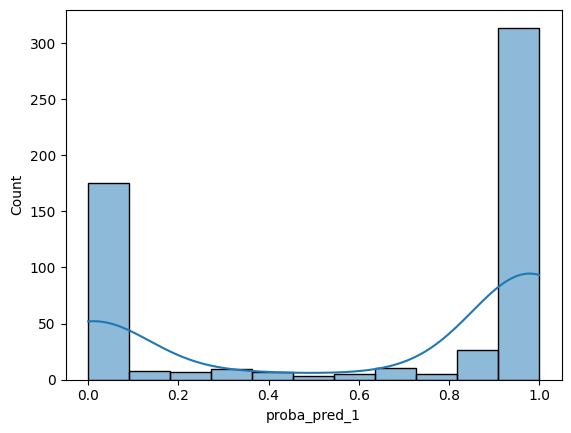

In [21]:
### Veamos la distroibución de las predicciones según su resultado

pred_cancer=pd.DataFrame(modelo_log_cancer.predict_proba(cancer_df))
pred_cancer.columns = ['proba_pred_0', 'proba_pred_1']

DF_revisión_cancer=pd.concat([Y_cancer_df,pred_cancer],axis=1)


## Histograma suavizado de las predicciones

import seaborn as sns
sns.histplot(data=DF_revisión_cancer, x="proba_pred_1", kde=True)
plt.show()

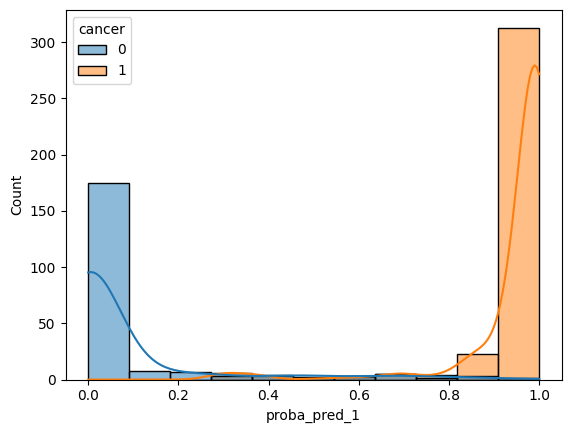

In [22]:
### Histigrama suavizado teniendo en cuenta el resultado real

sns.histplot(data=DF_revisión_cancer, x="proba_pred_1", hue="cancer", kde=True)
plt.show()


### Otro modelo de clasificación binaria usando la regresión logística y datasets de sklearn



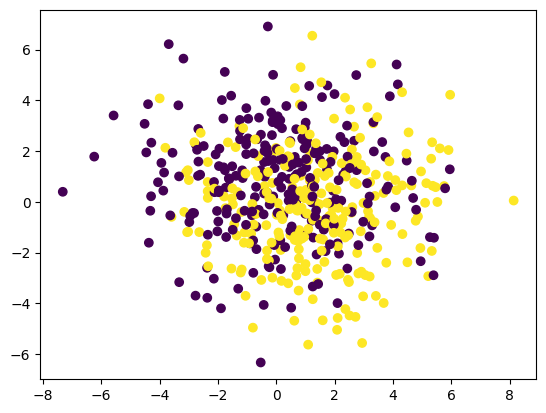

In [23]:
### Creamos dos lunas usando la función make_moons

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [24]:
# Hacemos un modelo de regresión logística

modelo_log_moons = LogisticRegression(random_state=42, max_iter=1000)
modelo_log_moons.fit(X, y)
Y_pred_moons = modelo_log_moons.predict(X)

In [25]:
Y_pred_moons

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [26]:
y_proba = modelo_log_moons.predict_proba(X)
y_proba[:,1]

array([0.47042882, 0.64836592, 0.60920378, 0.48666857, 0.34345009,
       0.62523936, 0.49535307, 0.37370001, 0.48626481, 0.64999244,
       0.58482455, 0.66943652, 0.81121307, 0.40035841, 0.76215457,
       0.64644916, 0.60970486, 0.46459332, 0.83242941, 0.70158617,
       0.58539638, 0.66394246, 0.27211656, 0.58881404, 0.53290705,
       0.23483625, 0.47449886, 0.45804789, 0.23609955, 0.4263885 ,
       0.67922802, 0.33536205, 0.7367898 , 0.40168674, 0.3805221 ,
       0.60489807, 0.38771957, 0.57130272, 0.32122979, 0.41504978,
       0.78434434, 0.23962059, 0.37075948, 0.50804635, 0.59537953,
       0.60116552, 0.55368833, 0.50612791, 0.66154131, 0.42308922,
       0.14120697, 0.17427793, 0.37139647, 0.50216797, 0.40054459,
       0.24705102, 0.4295025 , 0.44253495, 0.33874633, 0.20121182,
       0.57191733, 0.38458088, 0.46095491, 0.66168813, 0.24139217,
       0.42043366, 0.65639156, 0.33703212, 0.61881129, 0.61077943,
       0.74949279, 0.69537917, 0.37912552, 0.32874382, 0.52522

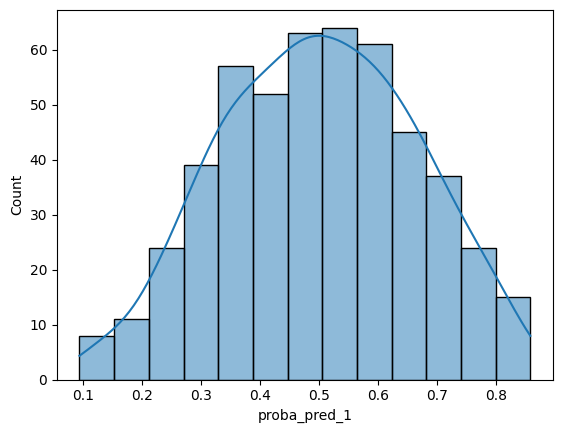

In [27]:
## Histograma suavizado de las predicciones

pred_moons=pd.DataFrame(modelo_log_moons.predict_proba(X))
pred_moons.columns = ['proba_pred_0', 'proba_pred_1']

DF_revisión_moons=pd.concat([pd.DataFrame(y),pred_moons],axis=1)
DF_revisión_moons.columns = ['real', 'proba_pred_0', 'proba_pred_1']

import seaborn as sns
sns.histplot(data=DF_revisión_moons, x="proba_pred_1", kde=True)
plt.show()


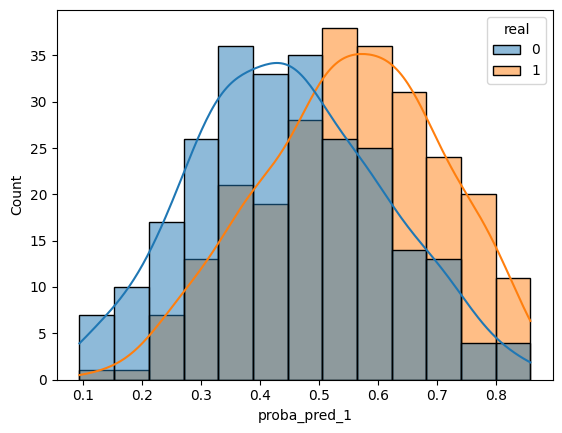

In [28]:
### Histigrama suavizado teniendo en cuenta el resultado real

sns.histplot(data=DF_revisión_moons, x="proba_pred_1", hue="real", kde=True)
plt.show()


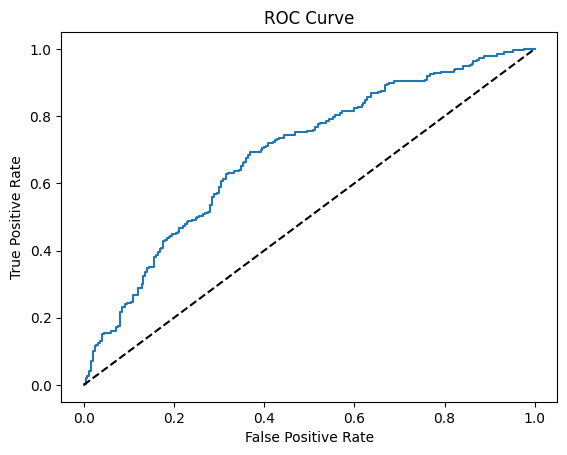

In [29]:
### Curva ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, modelo_log_moons.predict_proba(X)[:,1])

### Graficamos la curva ROC

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()


In [30]:
## Auc ROC

from sklearn.metrics import roc_auc_score

roc_auc_score(y, modelo_log_moons.predict_proba(X)[:,1])

0.690736

## Partición de los datos

Para evaluar el modelo, dividimos el dataset en dos partes: una parte para entrenar el modelo y otra parte para evaluar el modelo. La parte de entrenamiento se usa para ajustar el modelo a los datos, mientras que la parte de evaluación se usa para evaluar el desempeño del modelo en datos no vistos.

Se recomienda que la partición se dé entre el 70% y el 80% de los datos para entrenamiento y el resto para evaluación.

In [31]:
## Importamos train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=42)

In [32]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [33]:
y_train

,species
81,1
133,2
137,2
75,1
109,2
...,...
71,1
106,2
14,0
92,1


In [41]:
y_pred_test=modelo_log.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test,index=X_test.index)
pd.concat([y_pred_test,y_test],axis=1)

,0,species
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1
